# Multiple linear regression analysis

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Importing raw data

In [2]:
raw_data = pd.read_csv('strips_data.csv')
raw_data.head()
# ke, W, U, Nu/Nu0 represent turbulence intensity, verticle velocity, 
# streamwise velocity and convective heat transfer enhancement, respectively

,ke,W,U,Nu/Nu0
0,0.011328,-0.021940,0.628951,1.111257
1,0.015342,-0.029270,0.606158,1.187734
2,0.019698,-0.039965,0.577273,1.268142
3,0.023103,-0.052998,0.540090,1.353721
4,0.027022,-0.071219,0.499830,1.434628


## Data processing

### Checking the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,ke,W,U,Nu/Nu0
count,265.000000,265.000000,265.000000,265.000000
mean,0.018276,-0.038697,0.626480,1.421258
std,0.011022,0.038331,0.118003,0.305210
min,0.001154,-0.138023,0.319027,0.933611
25%,0.007756,-0.068372,0.558309,1.187734
50%,0.020063,-0.023325,0.619450,1.435739
75%,0.027552,-0.011221,0.733404,1.579060
max,0.040994,0.030170,0.844913,2.216603


### Checking and dealing with missing values

In [4]:
raw_data.isnull().sum()

ke        0
W         0
U         0
Nu/Nu0    0
dtype: int64

In [5]:
data = raw_data.copy()
data_update = data.dropna(axis=0)

In [6]:
data_update.isnull().sum()

ke        0
W         0
U         0
Nu/Nu0    0
dtype: int64

## Exploring probability density function, finding outliners

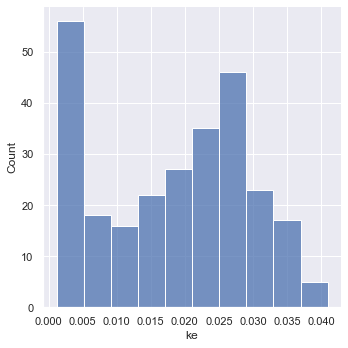

In [7]:
sns.displot(data_update['ke'])

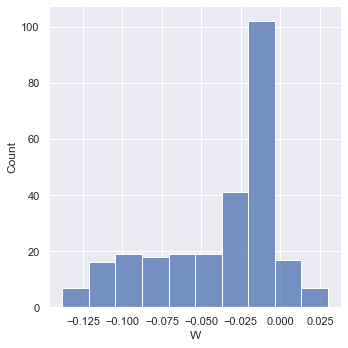

In [8]:
sns.displot(data_update['W'])

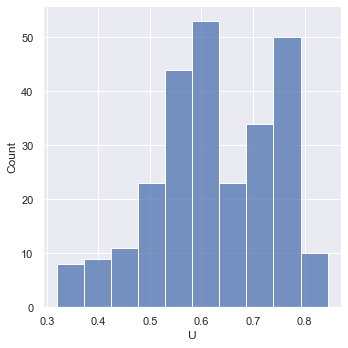

In [9]:
sns.displot(data_update['U'])

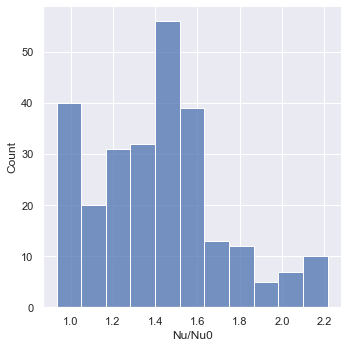

In [10]:
sns.displot(data_update['Nu/Nu0'])

In [11]:
# removing outliners, which might affect regression results
q = data_update['Nu/Nu0'].quantile(0.01)
data_1 = data_update[data_update['Nu/Nu0']>q]
data_1.describe(include='all')

,ke,W,U,Nu/Nu0
count,262.000000,262.000000,262.000000,262.000000
mean,0.018462,-0.039002,0.624852,1.426821
std,0.010946,0.038442,0.117682,0.302456
min,0.001154,-0.138023,0.319027,0.940182
25%,0.008036,-0.068418,0.556203,1.196775
50%,0.020217,-0.023751,0.618501,1.436865
75%,0.027623,-0.011823,0.728888,1.581442
max,0.040994,0.030170,0.844913,2.216603


## Checking linear assumptions

Text(0.5, 1.0, 'U and Nu/Nu0')

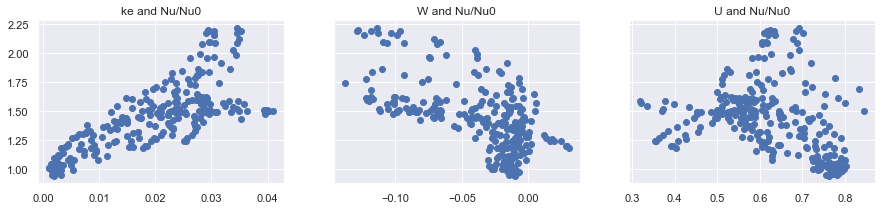

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 3))
ax1.scatter(data_1['ke'],data_1['Nu/Nu0'])
ax1.set_title('ke and Nu/Nu0')
ax2.scatter(data_1['W'],data_1['Nu/Nu0'])
ax2.set_title('W and Nu/Nu0')
ax3.scatter(data_1['U'],data_1['Nu/Nu0'])
ax3.set_title('U and Nu/Nu0')

## Checking multicollinearity

In [13]:
data_1.columns.values

array(['ke', 'W', 'U', 'Nu/Nu0'], dtype=object)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_1[['ke','W','U']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [15]:
vif

,VIF,Features
0,4.582693,ke
1,3.102720,W
2,2.650579,U


## Linear regression model

### Define inputs and targets

In [16]:
targets = data_1['Nu/Nu0']
inputs = data_1.drop(['Nu/Nu0'], axis = 1)

### Standardized the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [19]:
inputs_standardized = scaler.transform(inputs)

### Split dataset into test data and train data

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_standardized, targets, test_size=0.2, random_state=365)

### Create the regression

In [21]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
y_predict = reg.predict(x_train)

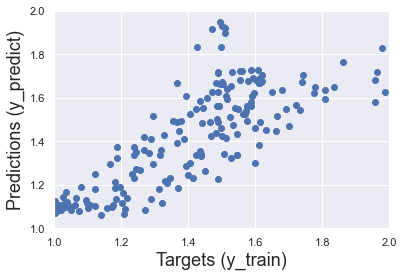

In [23]:
plt.scatter(y_train,y_predict)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_predict)', size = 18)
plt.xlim(1,2)
plt.ylim(1,2)
plt.show()
# predictions and targets distribute around the line y=x, which indicates that the prediction approximately represents the targets

Text(0.5, 1.0, 'Residuals PDF')

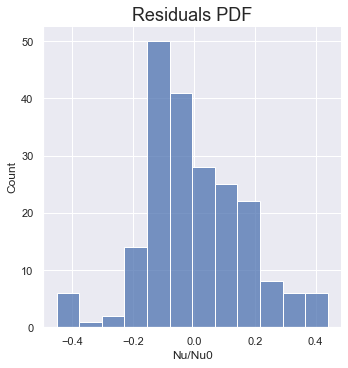

In [24]:
sns.displot(y_train - y_predict)
plt.title("Residuals PDF", size = 18)

In [25]:
reg.score(x_train,y_train)
# R-square of the multiple regression is approximately 0.7

0.6943196113482655

### Identifying the weights and bias

In [26]:
reg.intercept_

1.416200973095032

In [27]:
reg.coef_

array([ 0.24361186, -0.05273695,  0.06412312])

In [28]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights']=reg.coef_
reg_summary
# ke has the most significant impact on heat transfer

,Features,Weights
0,ke,0.243612
1,W,-0.052737
2,U,0.064123


### Testing

In [29]:
y_prediction_test = reg.predict(x_test)

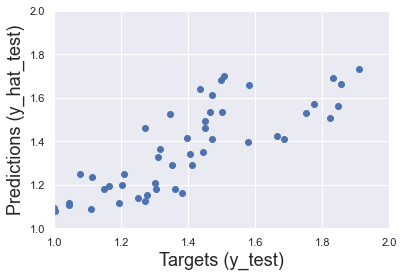

In [30]:
plt.scatter(y_test, y_prediction_test)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(1,2)
plt.ylim(1,2)
plt.show()
# Predictions could approximately represents targets

In [31]:
reg.score(x_test,y_test)
# R-square of regression is approximately 0.72

0.7084415370755888

In [32]:
df_all = pd.DataFrame(y_prediction_test,columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_all['Target'] = y_test
df_all.head()

,Prediction,Target
0,1.680594,1.497979
1,1.206282,1.300964
2,1.090886,0.945288
3,1.150372,1.277562
4,1.115422,1.042977


In [33]:
df_all['Residual'] = df_all['Target'] - df_all['Prediction']
df_all['Difference%'] = np.absolute(df_all['Residual']/df_all['Target']*100)
df_all.head()
# this table shows the difference between prediction and target

,Prediction,Target,Residual,Difference%
0,1.680594,1.497979,-0.182615,12.190736
1,1.206282,1.300964,0.094682,7.277838
2,1.090886,0.945288,-0.145598,15.402514
3,1.150372,1.277562,0.127190,9.955647
4,1.115422,1.042977,-0.072445,6.946026


In [34]:
df_all.describe()
# we could observe that the max difference is around 29.7%
# 75% of the data is less than 13% difference.

,Prediction,Target,Residual,Difference%
count,53.000000,53.000000,53.000000,53.000000
mean,1.395672,1.448172,0.052500,9.023891
std,0.229959,0.311289,0.159509,5.124812
min,1.077455,0.945288,-0.201577,0.185385
25%,1.180855,1.251201,-0.069857,4.623819
50%,1.397823,1.405814,0.058782,9.304221
75%,1.560072,1.582236,0.180747,12.748496
max,1.885854,2.196429,0.414146,18.855431


In [35]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_all.sort_values(by=['Difference%'])
# round and sort the values.

,Prediction,Target,Residual,Difference%
51,1.20,1.20,0.00,0.19
49,1.46,1.45,-0.01,0.72
43,1.33,1.31,-0.02,1.30
13,1.41,1.40,-0.02,1.35
38,1.09,1.11,0.02,2.02
42,1.53,1.50,-0.03,2.18
37,1.19,1.16,-0.03,2.56
10,1.18,1.15,-0.03,2.65
30,1.49,1.45,-0.04,2.72
27,1.25,1.21,-0.04,3.34


### Main findings:
1. The dataset could be fit with multiple linear regression model. 
2. Turbulence kinetic energy and streamwise velocity have the positive effect on heat transfer. On the other hand, vertical velocity negatively correlated with heat transfer.
3. Turbulence kinetic energy has the most significant effect on heat transfer.